In [2]:
import pandas as pd
import numpy as np
import numpy as np
import random

# keras
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Dropout, Input
#from keras.layers import Concatenate
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.utils.data_utils import get_file
from keras.preprocessing.text import Tokenizer
from keras.utils.vis_utils import model_to_dot, plot_model
from keras.datasets import imdb, reuters
from keras.preprocessing import sequence
from keras.optimizers import SGD, RMSprop

np.random.seed(13)import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import metrics
%matplotlib inline
sns.set()

In [3]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import plot_roc_curve
sns.set_style('whitegrid')

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.multioutput import MultiOutputClassifier

In [5]:
tf_df = pd.read_csv('../train_features.csv',index_col='sig_id')

In [6]:
pca = PCA(n_components=50)
pca.fit(tf_df.loc[:,'g-0':'c-99'])
pca.explained_variance_ratio_

array([0.41821179, 0.03871707, 0.02358361, 0.02074852, 0.01890126,
       0.01715049, 0.01382442, 0.01341586, 0.00987961, 0.00873211,
       0.00841602, 0.00780523, 0.0066486 , 0.005899  , 0.00580112,
       0.00560802, 0.00517967, 0.0047722 , 0.0047209 , 0.00426508,
       0.00396959, 0.00371703, 0.00340236, 0.00314083, 0.00311072,
       0.00292179, 0.00282076, 0.00268929, 0.00262018, 0.00252042,
       0.00234754, 0.00226741, 0.00222958, 0.00213942, 0.00210244,
       0.00201046, 0.0019913 , 0.00192284, 0.00186805, 0.00180152,
       0.00175073, 0.00168299, 0.00165042, 0.00163928, 0.00160863,
       0.00159355, 0.00156654, 0.00154681, 0.00151286, 0.00148292])

Large drops after 2, 6, 8, 12 components.

In [7]:
reduced_comps = pca.transform(tf_df.loc[:,'g-0':'c-99'])
reduced_comps.shape

(23814, 50)

In [8]:
reduced_comps = reduced_comps[:,:6]
reduced_comps.shape

(23814, 6)

In [9]:
tts_df = pd.read_csv('../train_targets_scored.csv',index_col='sig_id')
moa1 = tts_df.iloc[:,0]
print(moa1.head())

sig_id
id_000644bb2    0
id_000779bfc    0
id_000a6266a    0
id_0015fd391    0
id_001626bd3    0
Name: 5-alpha_reductase_inhibitor, dtype: int64


In [1]:
tts_df.columns[55:65]

NameError: name 'tts_df' is not defined

In [11]:
len(moa1[moa1==1])

17

In [12]:
nb1_model = GaussianNB()
nb1_model.fit(reduced_comps,moa1)
nb1_model.score(reduced_comps,moa1)

0.9992861342067691

In [14]:
metrics.log_loss(moa1,nb1_model.predict(reduced_comps))

0.02465605100837765

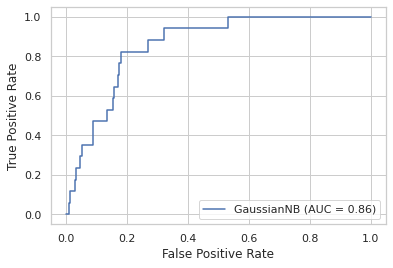

In [15]:
ax = plt.gca()
plot_roc_curve(nb1_model,reduced_comps,moa1,ax=ax)
plt.show()

In [16]:
nb_model = MultiOutputClassifier(GaussianNB())
nb_model.fit(reduced_comps,tts_df)
tts_pred = nb_model.predict(reduced_comps)
print(nb_model.score(reduced_comps,tts_df))
metrics.log_loss(tts_df,tts_pred)

0.2127739984882842


10.294995247425732

In [17]:
metrics.log_loss(moa1,tts_pred[:,0])

0.02465605100837765

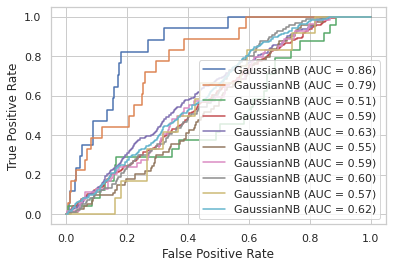

In [19]:
ax = plt.gca()
for i in range(10):
    plot_roc_curve(nb1_model,reduced_comps,tts_df.iloc[:,i],ax=ax)
plt.show()

Interesting. So it happens that we can predict column 1 quite well, but on average, worse than 21%.

Odd that the log loss is *worse* for Naive Bayes when the accuracy is significantly better.

No wonder they want people pulling out deep learning to attack this.

Would be good to cycle through the whole list and see which columns perform how.

Oh, and very interesting to see if any of the PCA components got zero coefficients under L1 regularization... for each target... that's a lot to check.

Can take this, spit it out and upload it to Kaggle as a baseline along with the logistic regression results.

In [21]:
(pd.DataFrame(tts_pred,columns=tts_df.columns,index=tf_df.index)).to_csv(path_or_buf=
            '../metis-NB-pred-moa.csv',float_format='%8.6f%')

In [27]:
pca50 = pca.transform(tf_df.loc[:,'g-0':'c-99'])

In [28]:
nb1all_model = GaussianNB()
nb1all_model.fit(pca50,moa1)
nb1all_model.score(pca50,moa1)

0.7834887041236248

In [29]:
pca8 = pca50[:,:8]

In [30]:
nb1all_model = GaussianNB()
nb1all_model.fit(pca8,moa1)
nb1all_model.score(pca8,moa1)

0.9866885025615184

In [31]:
metrics.log_loss(moa1,nb1all_model.predict(pca8))

0.459773007273371

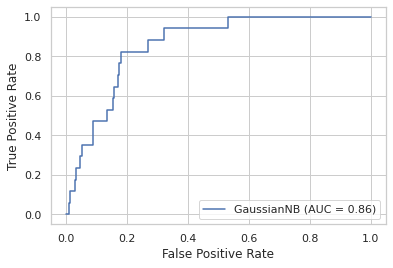

In [15]:
ax = plt.gca()
plot_roc_curve(nb1_model,reduced_comps,moa1,ax=ax)
plt.show()

In [16]:
nb_model = MultiOutputClassifier(GaussianNB())
nb_model.fit(reduced_comps,tts_df)
tts_pred = nb_model.predict(reduced_comps)
print(nb_model.score(reduced_comps,tts_df))
metrics.log_loss(tts_df,tts_pred)

0.2127739984882842


10.294995247425732

In [17]:
metrics.log_loss(moa1,tts_pred[:,0])

0.02465605100837765

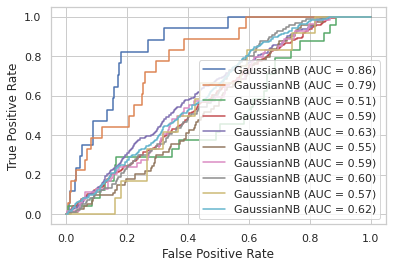

In [19]:
ax = plt.gca()
for i in range(10):
    plot_roc_curve(nb1_model,reduced_comps,tts_df.iloc[:,i],ax=ax)
plt.show()